# Step 1 : Understand Problem Statement


Segmentation of customers according to the given dataset.

# Step 2: import nessasary Libraries and Datasets


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler,normalize 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
creditcard_df=pd.read_csv('marketing_data.csv')

In [4]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df['BALANCE'].mean()

1564.4748276781038

In [7]:
creditcard_df['BALANCE'].max()

19043.13856

In [8]:
creditcard_df['BALANCE'].min()

0.0

In [9]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [16]:
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Step 3:Visualization of Dataset

In [20]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [21]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=creditcard_df['MINIMUM_PAYMENTS'].mean()

In [23]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [24]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=creditcard_df['CREDIT_LIMIT'].mean()

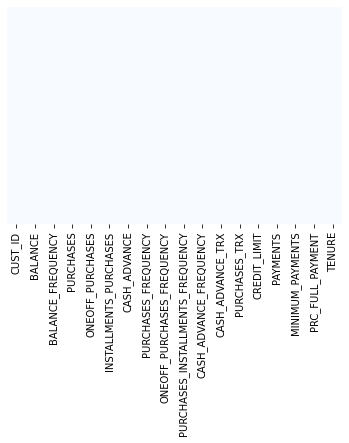

In [25]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

In [28]:
#check duplicate entries in the dataset
creditcard_df.duplicated().sum()

0

In [32]:
creditcard_df.drop('CUST_ID',axis=1,inplace=True)

In [33]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [34]:
len(creditcard_df.columns)

17

In [35]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

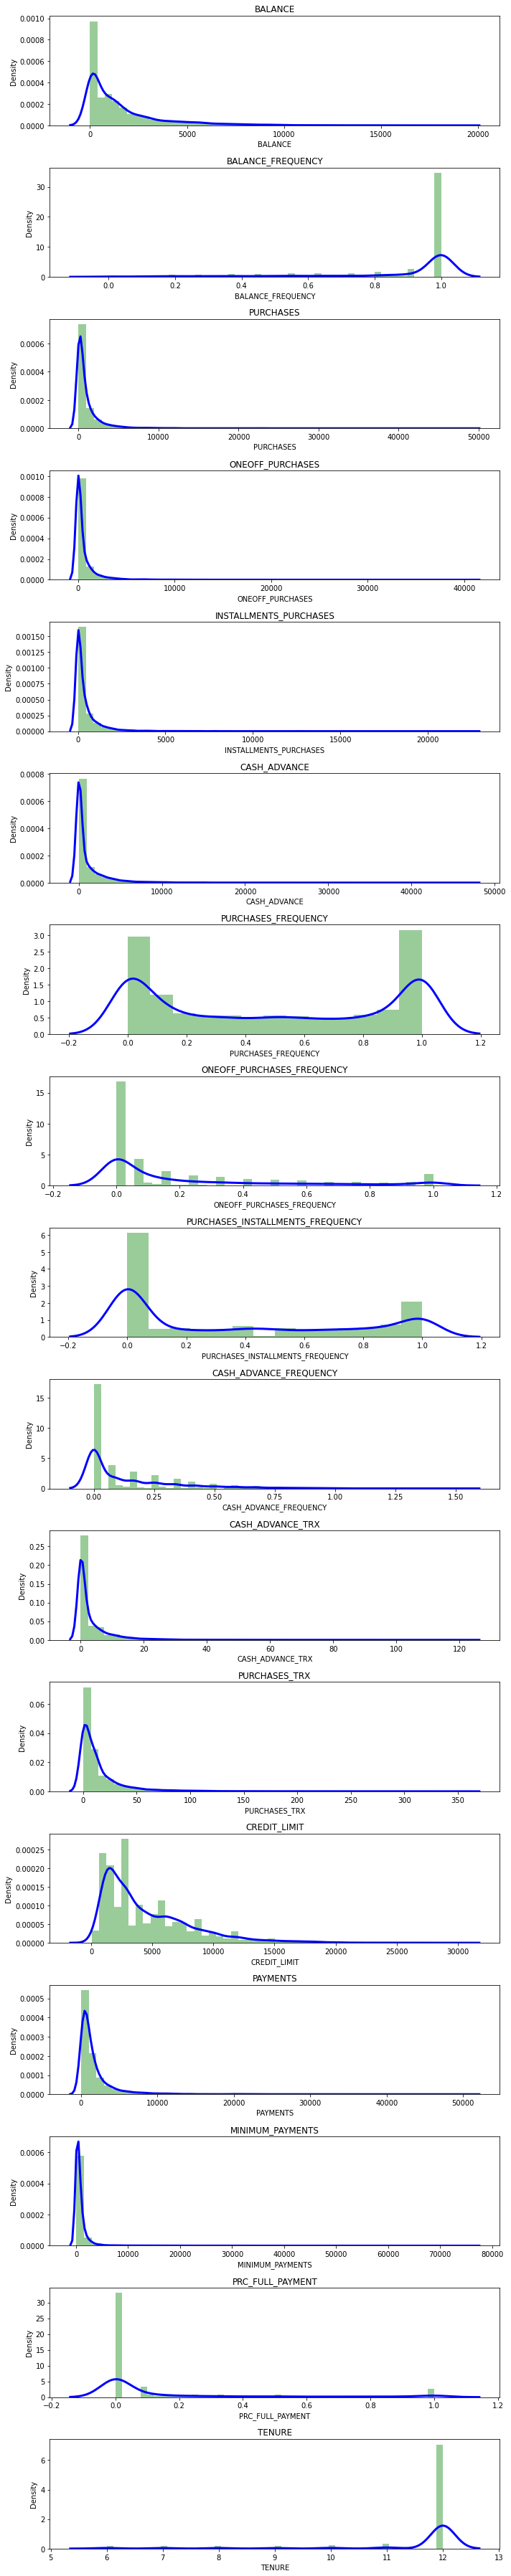

In [37]:
#distplot combination of matplotlib.hist function and seaborn kdeplot()
#KDE-Kernal density estimate
#KDE for visualising probability density of a continous variable
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

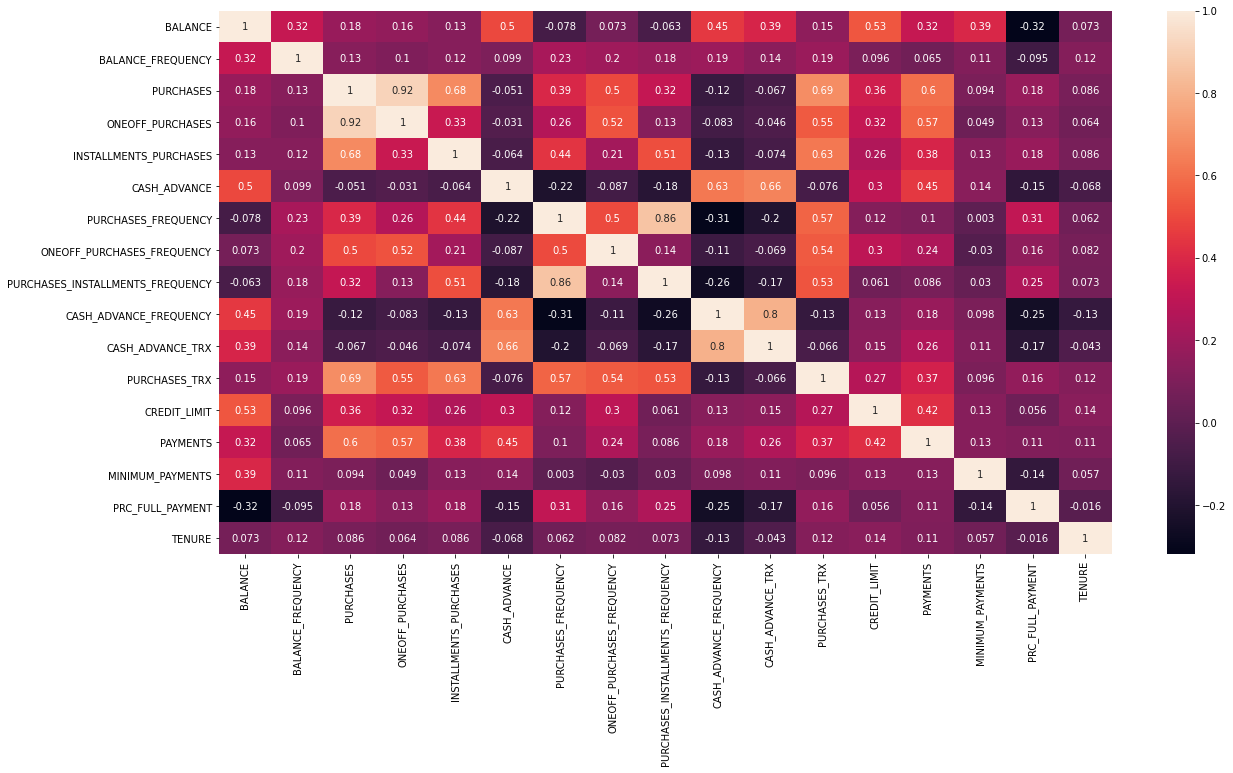

In [39]:
#coorelation matrix between features

correlations = creditcard_df.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True)

## Step 4: KMeans Algorithm
https://www.goeduhub.com/760/what-is-clustering-in-unsupervised-learning

## Step 5:Elbow Method

In [42]:
#scaler data
scaler=StandardScaler()
creditcard_df_s = scaler.fit_transform(creditcard_df)

In [43]:
creditcard_df_s.shape

(8950, 17)

In [44]:
creditcard_df_s

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

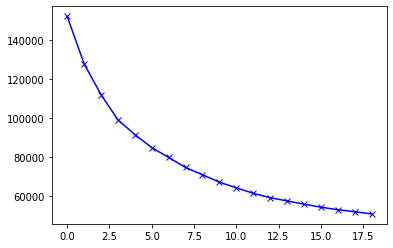

In [46]:
scores=[]

range_values=range(1,20)

for i in range_values:
  kmean = KMeans(n_clusters=i)
  kmean.fit(creditcard_df_s)
  scores.append(kmean.inertia_)

plt.plot(scores,'bx-')

## Step 6:Apply Kmeans Algoithm

In [47]:
kmeans=KMeans(7)
kmeans.fit(creditcard_df_s)

label = kmeans.labels_

In [48]:
kmeans.cluster_centers_.shape

(7, 17)

In [49]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.005842,0.402942,-0.347202,-0.229367,-0.399338,-0.110253,-0.824735,-0.367739,-0.749511,0.078304,-0.045657,-0.471145,-0.309381,-0.251073,-0.004585,-0.455691,0.273604
1,-0.332803,0.360471,0.070794,-0.044630,0.249083,-0.367675,0.995070,0.287057,0.891846,-0.470920,-0.359941,0.271471,-0.104316,-0.153465,-0.088958,0.361096,0.272769
2,-0.342727,-0.333970,-0.280537,-0.207693,-0.281410,0.057901,-0.171041,-0.272006,-0.206438,0.290957,-0.008714,-0.379432,-0.561751,-0.389913,-0.208337,0.026027,-3.175560
3,-0.701735,-2.132679,-0.307031,-0.232805,-0.298160,-0.322394,-0.530884,-0.440472,-0.418225,-0.523420,-0.377892,-0.413581,-0.173791,-0.192767,-0.257563,0.289216,0.202287
4,1.639386,0.398225,-0.216206,-0.151410,-0.233121,1.949346,-0.462210,-0.183634,-0.419110,1.881486,1.871359,-0.259670,1.000221,0.774468,0.541280,-0.396502,0.077634
5,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
6,0.683357,0.467024,2.042400,1.680480,1.741776,-0.217624,1.154737,1.753478,1.033094,-0.331801,-0.235995,2.387266,1.198844,1.122987,0.295635,0.404668,0.313354


In [50]:
cluster_centers = scaler.inverse_transform(cluster_centers)

cluster_centers = pd.DataFrame(data=cluster_centers,columns=[creditcard_df.columns])

cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1576.633427,0.972724,261.401872,211.734926,49.951517,747.666032,0.159345,0.092754,0.066562,0.150814,2.937253,2.998924,3368.794072,1006.311808,853.521351,0.020433,11.883471
1,871.773854,0.962663,1154.457535,518.361447,636.310628,207.840069,0.889720,0.288092,0.718880,0.040908,0.792494,21.457597,4114.903455,1288.878544,656.894798,0.259329,11.882353
2,851.116990,0.798156,403.832911,247.710344,156.592050,1100.292659,0.421704,0.121313,0.282394,0.193368,3.189358,5.278560,2450.570343,604.382531,378.685032,0.161327,7.267606
3,103.873507,0.372059,347.227614,206.028687,141.445644,302.796560,0.277281,0.071056,0.198224,0.030402,0.669992,4.429759,3862.127551,1175.101188,263.966906,0.238305,11.788030
4,4976.717437,0.971607,541.277522,341.127987,200.259567,5066.741502,0.304843,0.147676,0.197872,0.511649,16.019481,8.255411,8133.662928,3975.151450,2125.635743,0.037745,11.621212
5,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
6,2986.825486,0.987904,5366.824000,3381.690067,1986.133933,522.502605,0.953802,0.725554,0.775015,0.068747,1.638333,74.048333,8856.333333,4984.081773,1553.170944,0.272073,11.936667


In [51]:
label.shape

(8950,)

In [53]:
label.max()

6

In [54]:
label.min()

0

In [55]:
y = kmeans.fit_predict(creditcard_df_s)
y

array([2, 3, 0, ..., 6, 6, 6], dtype=int32)

In [56]:
creditcard_df_cluster = pd.concat([creditcard_df,pd.DataFrame({'cluster':label})],axis=1)

creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


## Step 7:Visualization

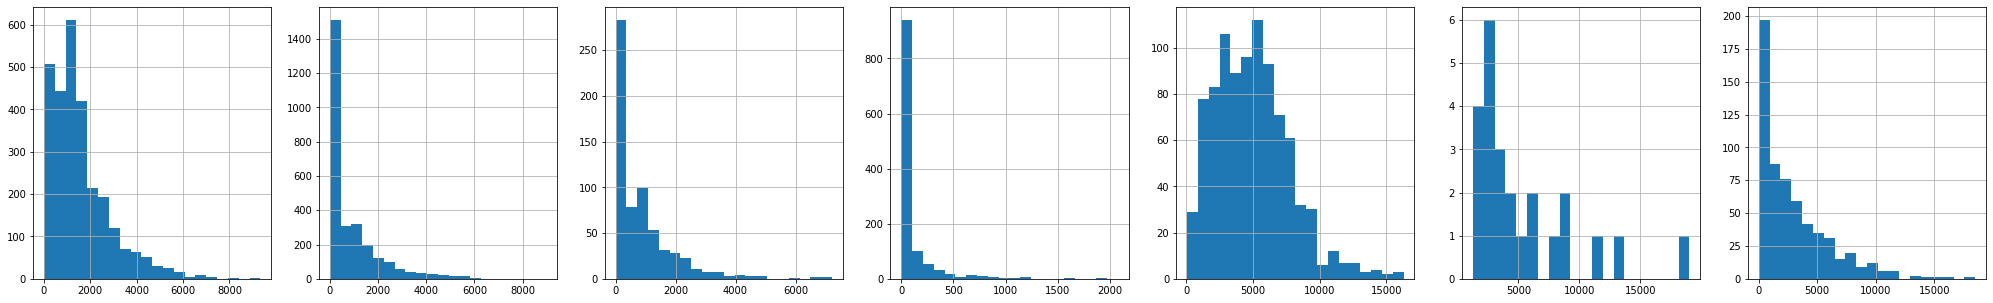

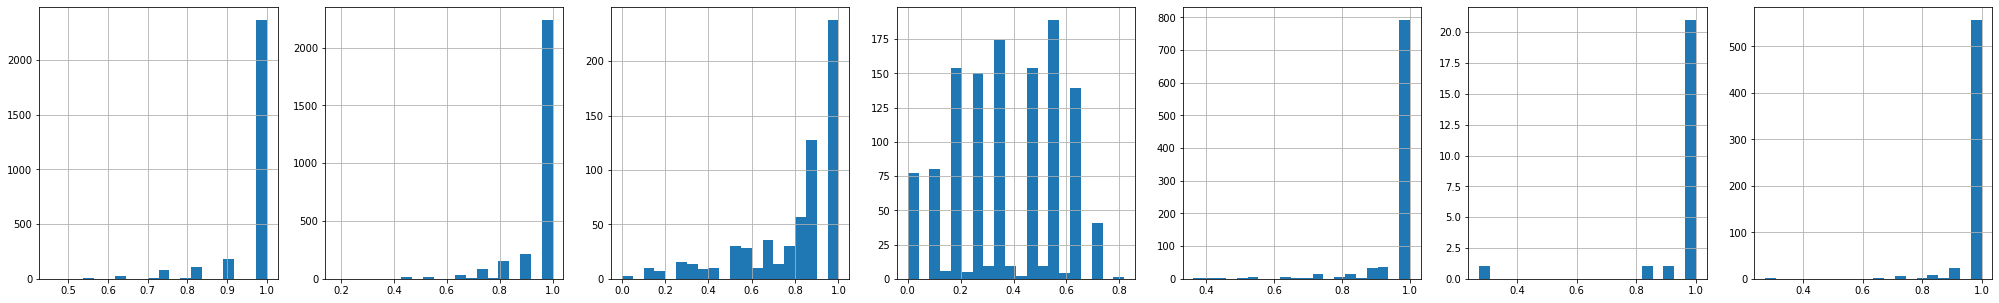

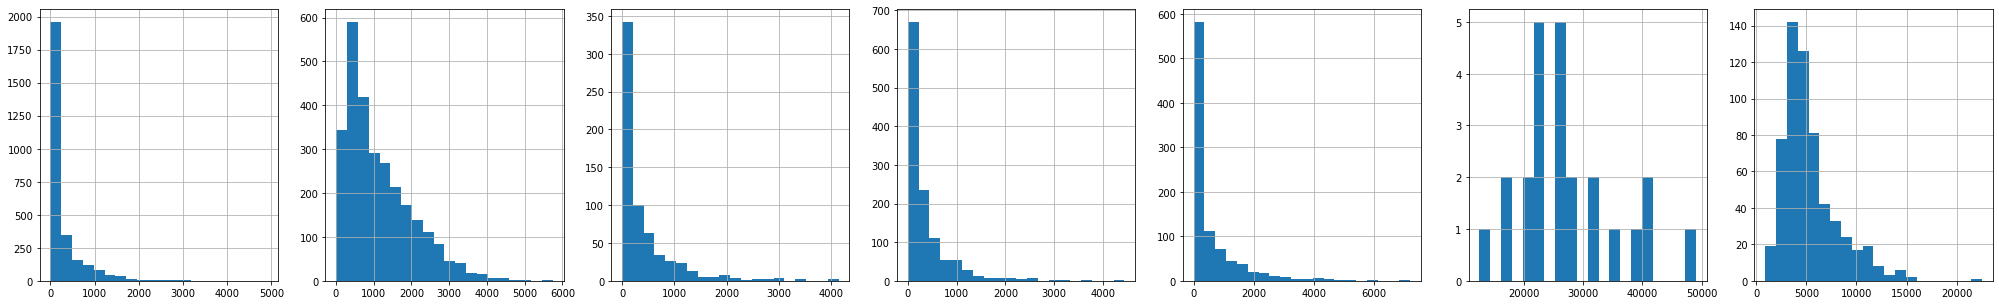

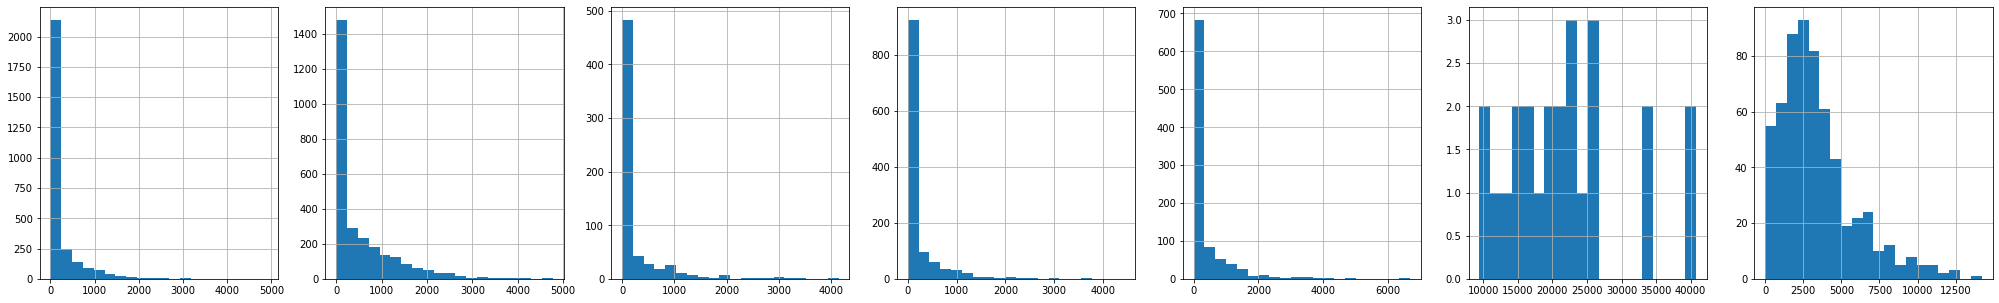

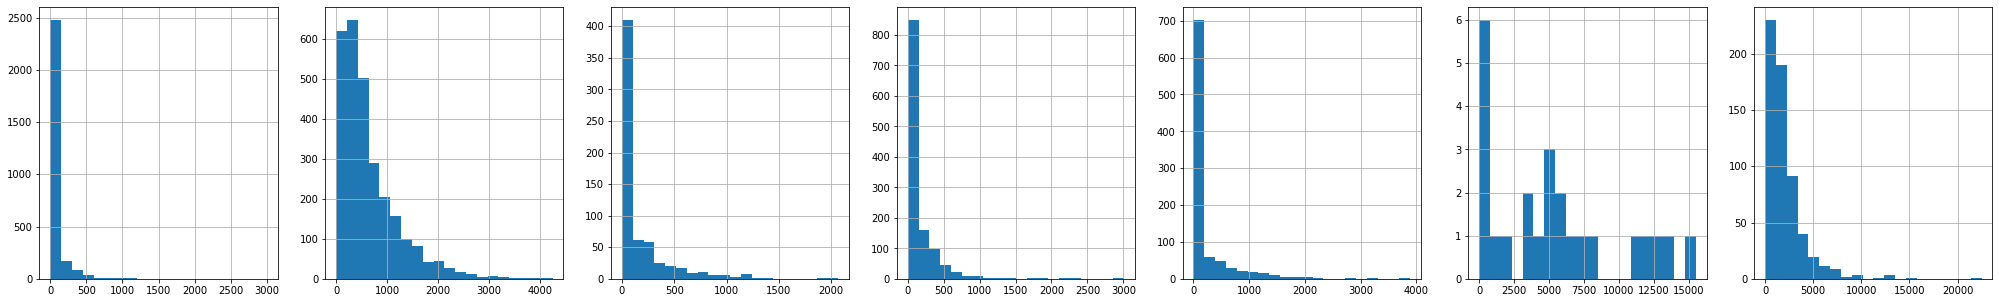

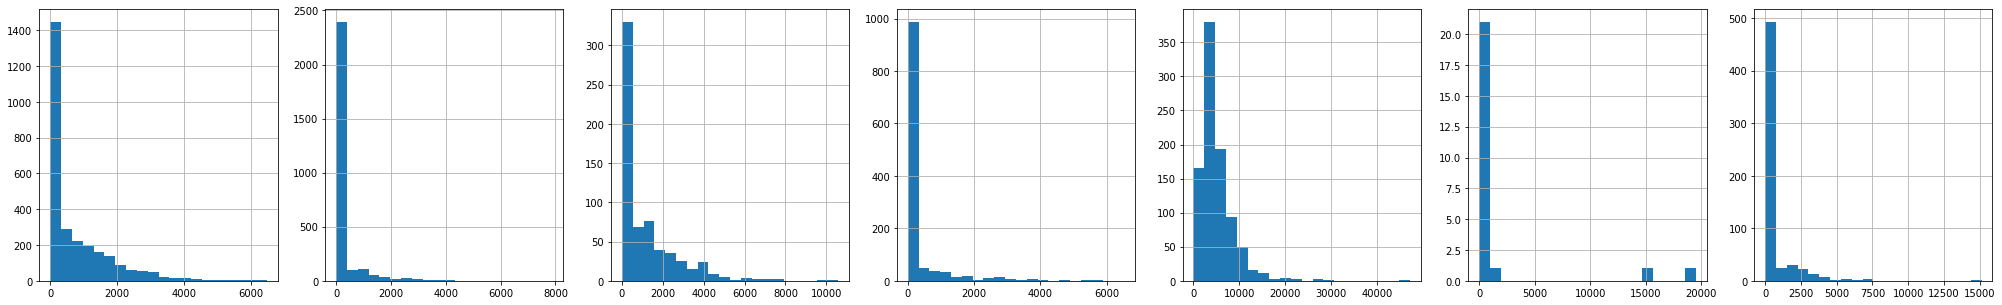

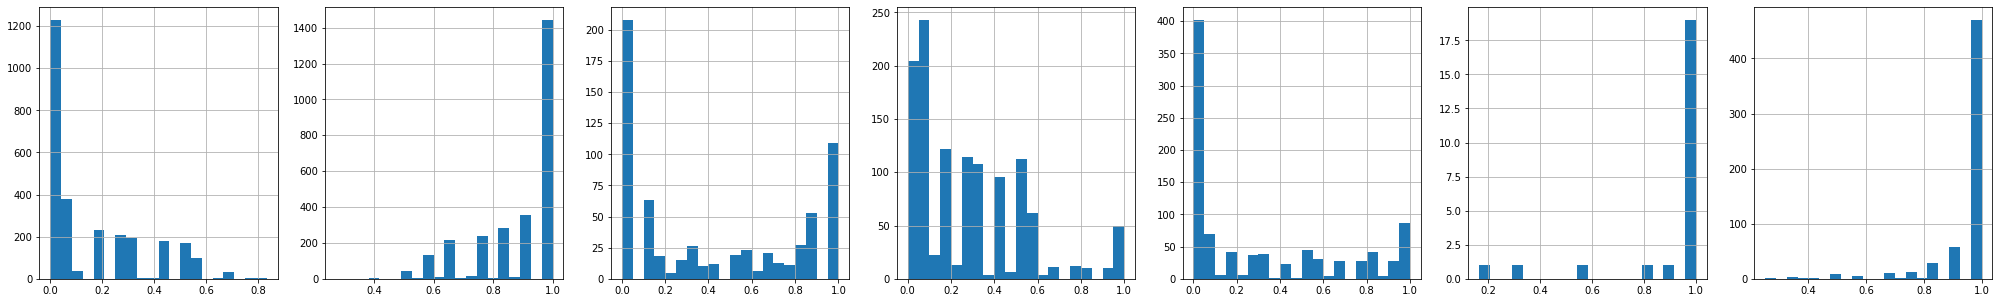

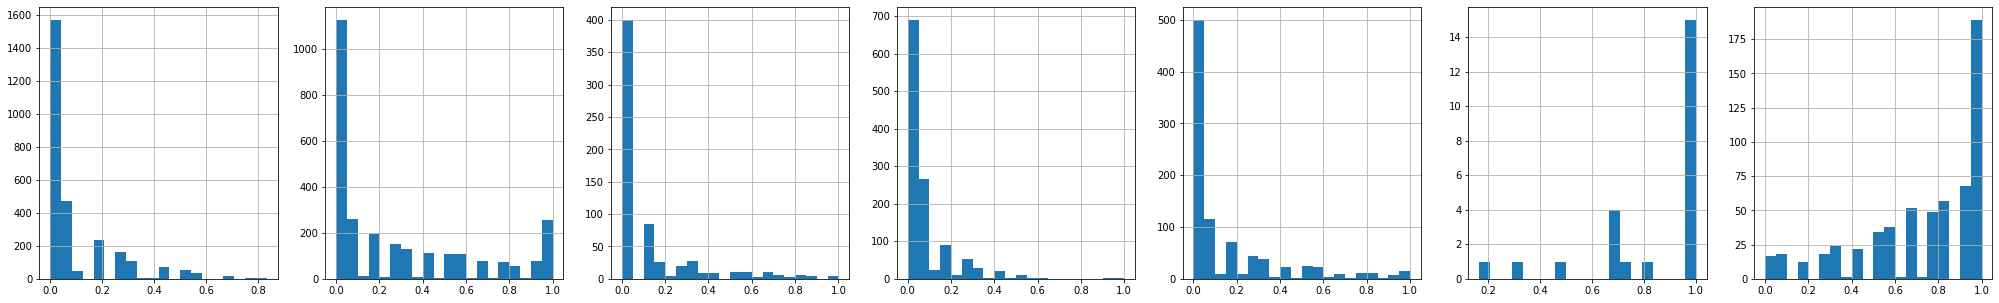

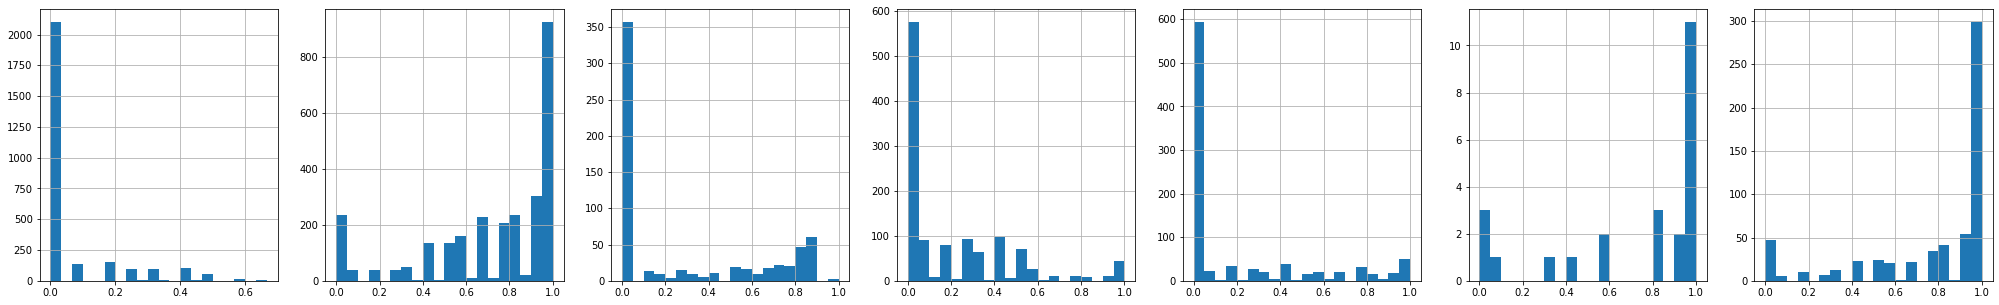

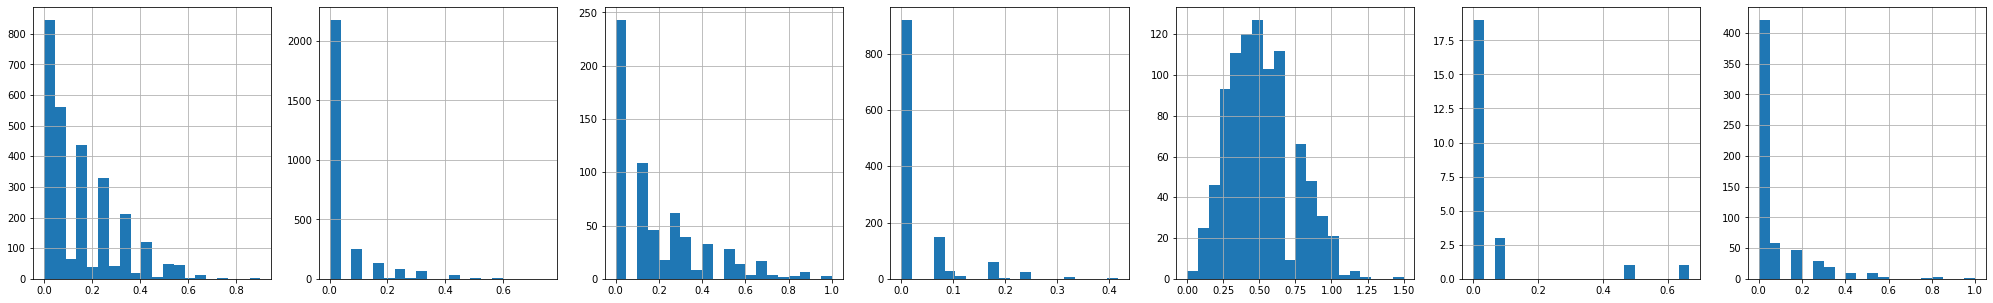

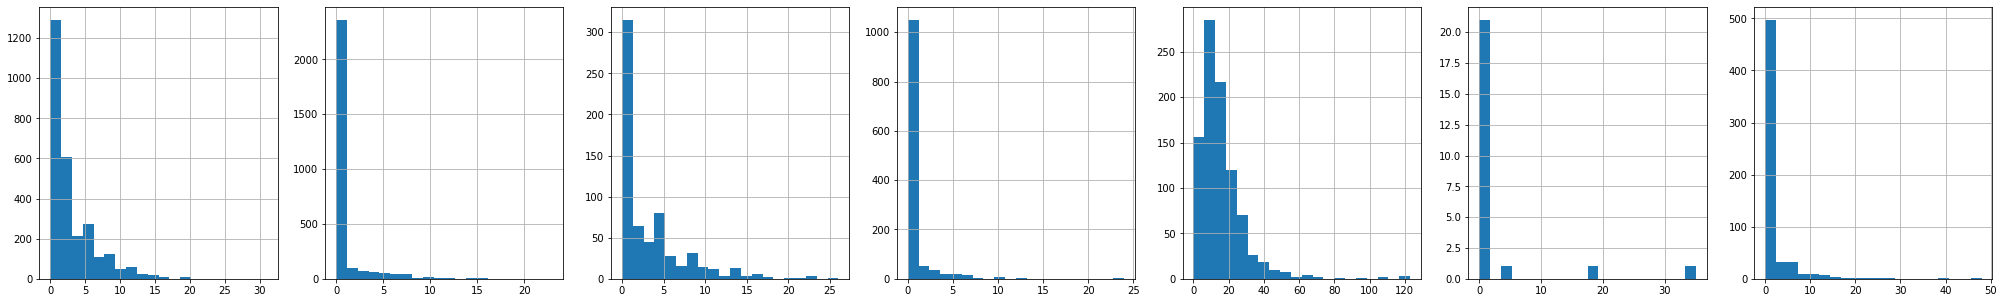

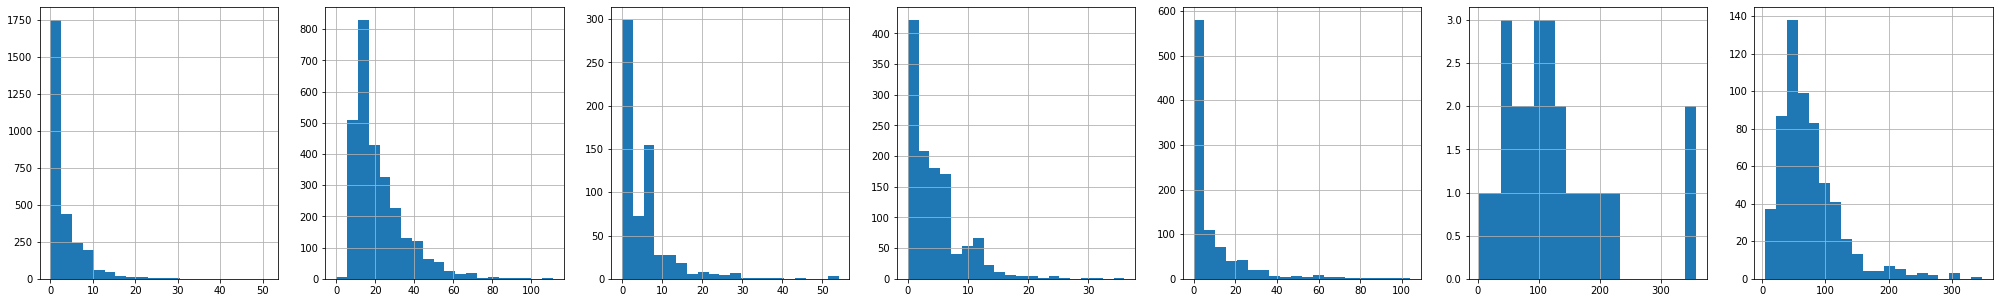

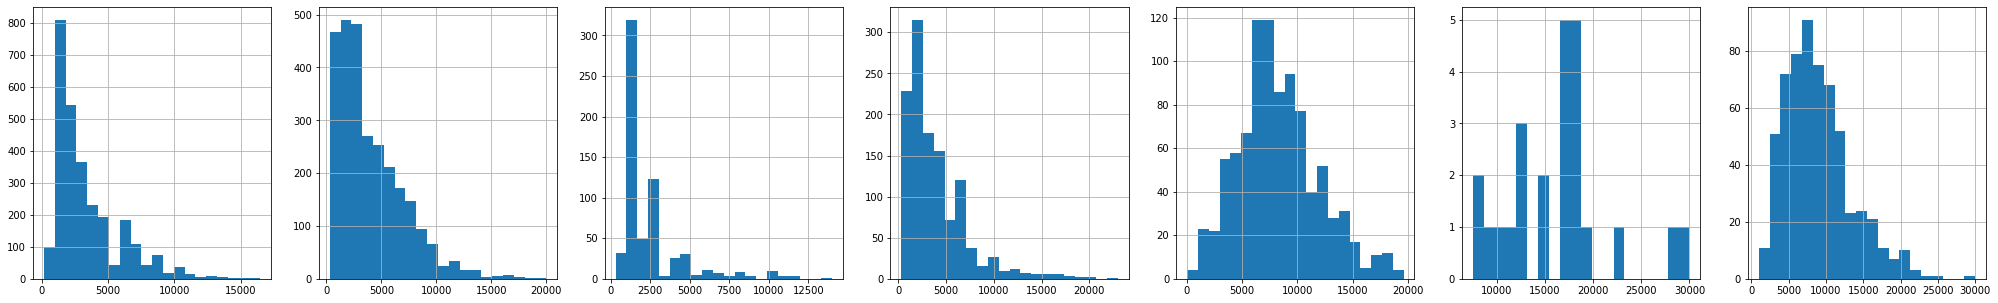

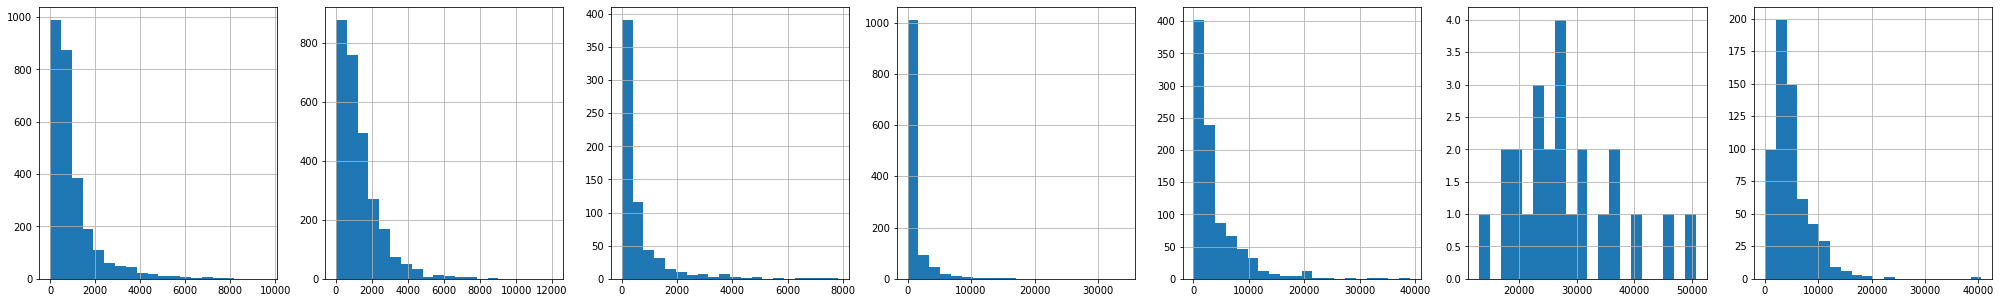

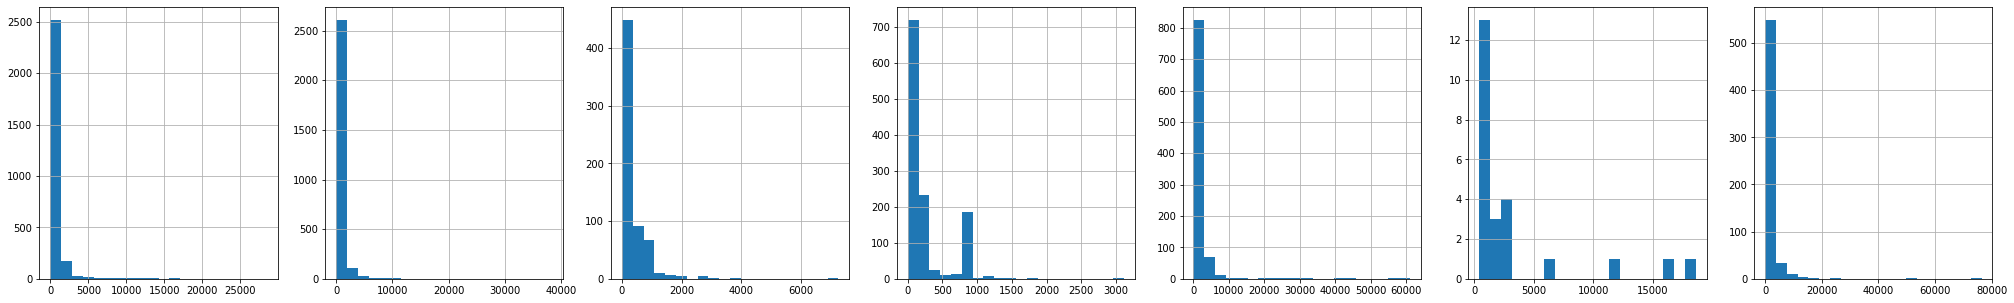

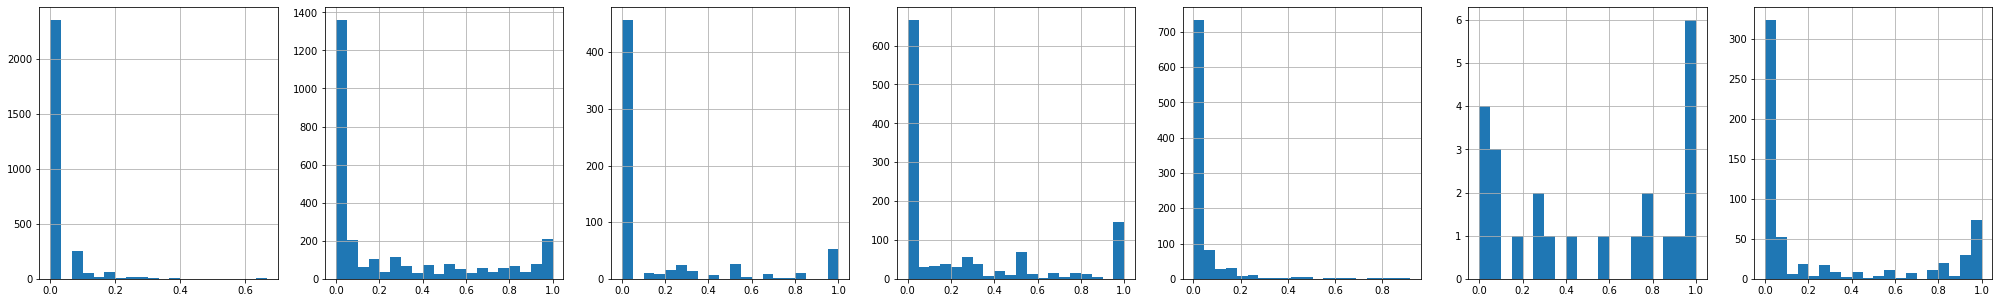

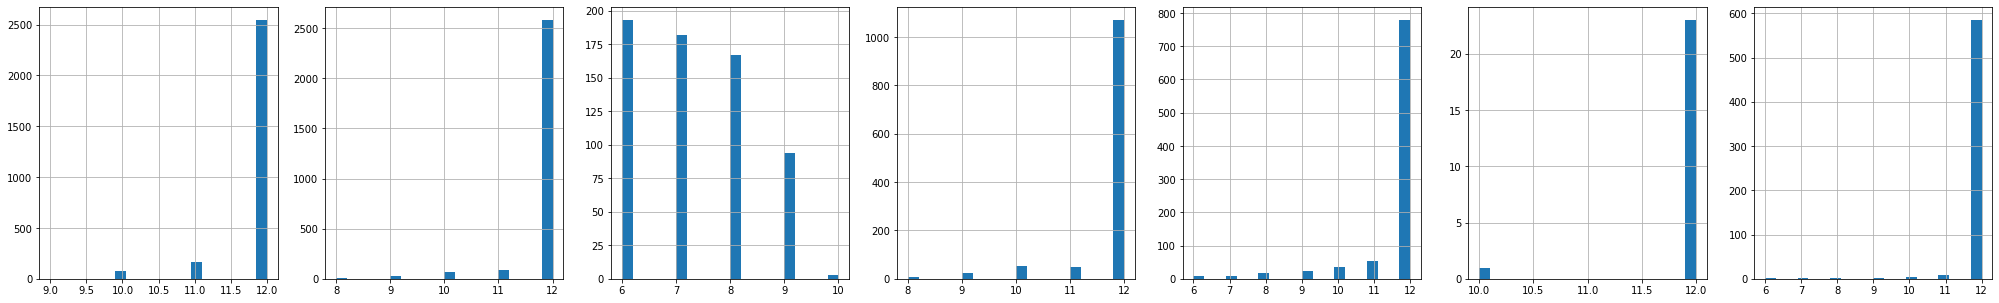

In [57]:
#plot histogram
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster=creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
    cluster[i].hist(bins=20)
  plt.show()


## Principle componenet analysis

In [59]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_s)
principal_comp

array([[-1.68222134, -1.07644751],
       [-1.13829807,  2.50649022],
       [ 0.96967742, -0.38350318],
       ...,
       [-0.92620296, -1.8107896 ],
       [-2.33654834, -0.65797684],
       [-0.5564202 , -0.40047237]])

In [62]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])

pca_df

,pca1,pca2
0,-1.682221,-1.076448
1,-1.138298,2.506490
2,0.969677,-0.383503
3,-0.873629,0.043171
4,-1.599435,-0.688580
...,...,...
8945,-0.359629,-2.016149
8946,-0.564369,-1.639126
8947,-0.926203,-1.810790
8948,-2.336548,-0.657977


In [63]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':label})],axis=1)
pca_df

,pca1,pca2,cluster
0,-1.682221,-1.076448,0
1,-1.138298,2.506490,4
2,0.969677,-0.383503,1
3,-0.873629,0.043171,0
4,-1.599435,-0.688580,0
...,...,...,...
8945,-0.359629,-2.016149,2
8946,-0.564369,-1.639126,2
8947,-0.926203,-1.810790,2
8948,-2.336548,-0.657977,2


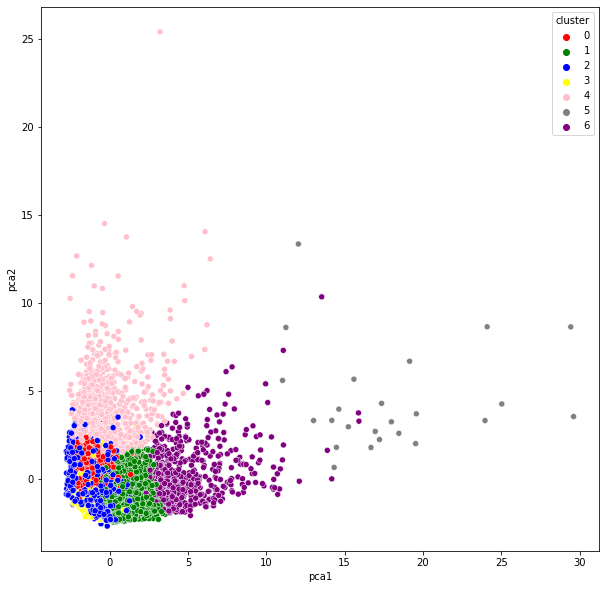

In [64]:
plt.figure(figsize=(10,10))
ax= sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df,palette=['red','green','blue','yellow','pink','gray','purple'])
plt.show()